**NOTA BENE** 

Se volete  modificare la classe, fatte un altro file Radiofitter.py

### IMPORTIAMO LE LIBRERIE

In [1]:
import os 
import sys
import numpy as np

import matplotlib.pyplot as plt
from scipy import optimize

sys.path.append("/home/jovyan/experience-milky-way-at-21cm-2023-mmlab02")
from Radiofitter_j import Radio_fitter

## FIT PRIMO QUADRANTE

In [2]:
#raw data
I_quad=["spectrum_66199.txt","spectrum_66192.txt","spectrum_66193.txt","spectrum_66194.txt","spectrum_66195.txt", "spectrum_66288.txt","spectrum_66289.txt","spectrum_66290.txt","spectrum_66291.txt"]
I_quad=np.append(I_quad, ["spectrum_66389.txt","spectrum_66381.txt"])
#I_quad=["spectrum_66289.txt"]

for ii in range(len(I_quad)):
    input_filename=I_quad[ii]
    mg_fit=Radio_fitter("relative velocity to LSR[km/s]", "intensity [arb. un.]")
    mg_fit.read_data(input_filename)
    #mg_fit.plot_data()
    
"""main_dir = os.getcwd()
results_julia_dir = os.path.join(main_dir,"results_julia")
output_filename = os.path.join(results_julia_dir,"raw_data_example")
plt.savefig(output_filename+".png")"""

'main_dir = os.getcwd()\nresults_julia_dir = os.path.join(main_dir,"results_julia")\noutput_filename = os.path.join(results_julia_dir,"raw_data_example")\nplt.savefig(output_filename+".png")'

In [3]:
#preprocessing

beg=[-60,-80,-80,-100,-90,-100,-100,-100,-100] #you get this looking at the data
end=[100, 90,100,60,60,25,25,25,25]

beg=np.append(beg,[-100,-80])
end=np.append(end,[40,100])

#beg=[-100]
#end=[25]
for ii in range(len(I_quad)):
    input_filename=I_quad[ii]
    mg_fit=Radio_fitter("relative velocity to LSR[km/s]", "intensity [arb. un.]")
    mg_fit.read_data(input_filename)
    
    #after looking at the raw data
    mg_fit.baseline(beg[ii],end[ii])
    #mg_fit.preprocessing(plot=True)
    
"""main_dir = os.getcwd()
results_julia_dir = os.path.join(main_dir,"results_julia")
output_filename = os.path.join(results_julia_dir,"preprocessing_example")
plt.savefig(output_filename+".png")"""

'main_dir = os.getcwd()\nresults_julia_dir = os.path.join(main_dir,"results_julia")\noutput_filename = os.path.join(results_julia_dir,"preprocessing_example")\nplt.savefig(output_filename+".png")'

3.259950443555115
0.003490658503988659
--------------------------
Glon: 39.88 $\pm$ 0.20
Parameters of best fit:
c0 -2.48 $\pm$ 0.80
c1 61.12 $\pm$ 5.89
m1 57.66 $\pm$ 3.26
s1 16.33 $\pm$ 1.82
c2 70.96 $\pm$ 6.79
m2 19.96 $\pm$ 2.77
s2 14.06 $\pm$ 1.55
c3 31.02 $\pm$ 2.21
m3 -43.84 $\pm$ 1.65
s3 17.77 $\pm$ 2.04
Chisq_red 0.36
V_max 198.74 $\pm$ 3.31
R 5.4506 $\pm$ 0.0228
1.5836075260025682
0.003490658503988659
--------------------------
Glon: 44.82 $\pm$ 0.20
Parameters of best fit:
c0 -1.01 $\pm$ 0.49
c1 73.94 $\pm$ 6.13
m1 55.17 $\pm$ 1.58
s1 12.00 $\pm$ 0.83
c2 73.44 $\pm$ 5.49
m2 18.99 $\pm$ 1.79
s2 13.63 $\pm$ 0.98
c3 30.80 $\pm$ 1.92
m3 -46.50 $\pm$ 0.57
s3 14.05 $\pm$ 0.64
Chisq_red 0.78
V_max 210.23 $\pm$ 1.67
R 5.9911 $\pm$ 0.0210
1.2392668715626498
0.003490658503988659
--------------------------
Glon: 49.82 $\pm$ 0.20
Parameters of best fit:
c0 -0.07 $\pm$ 0.02
c1 75.48 $\pm$ 5.68
m1 50.03 $\pm$ 1.24
s1 11.98 $\pm$ 0.44
c2 79.99 $\pm$ 6.31
m2 14.11 $\pm$ 1.29
s2 12.21 $\pm$ 

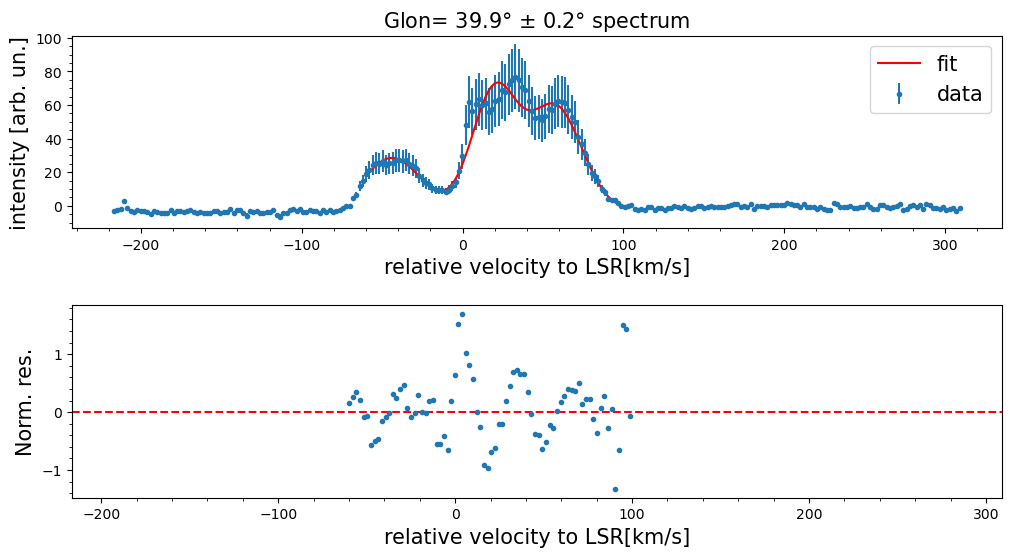

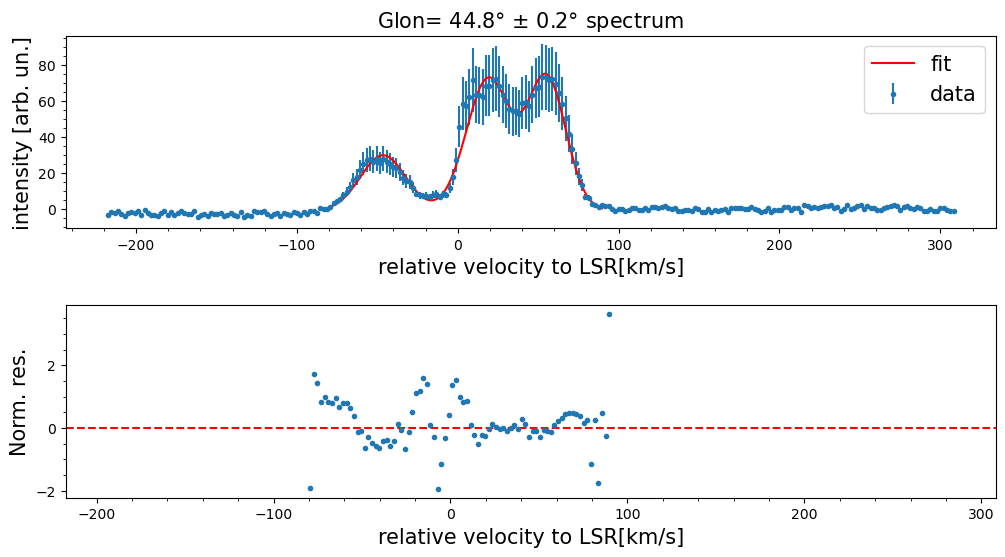

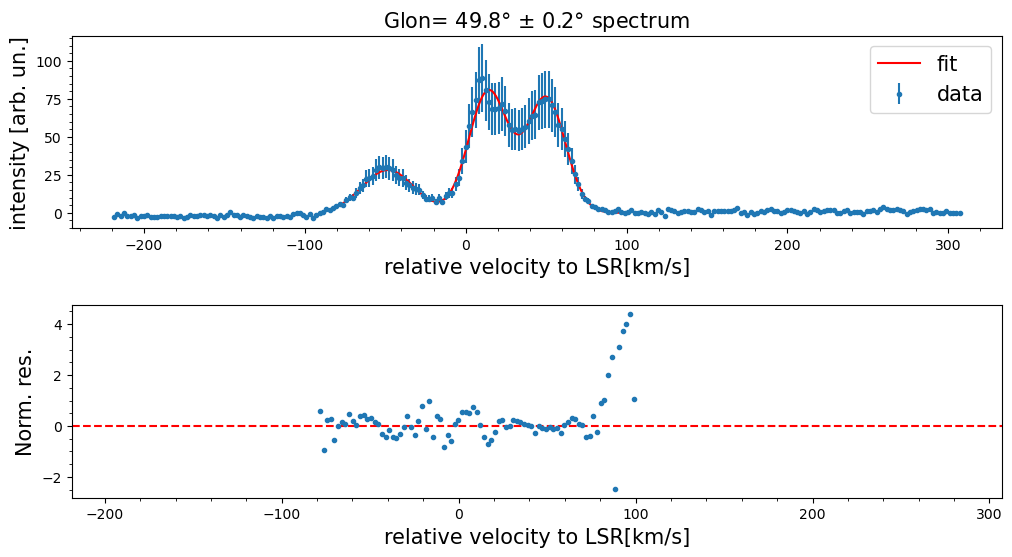

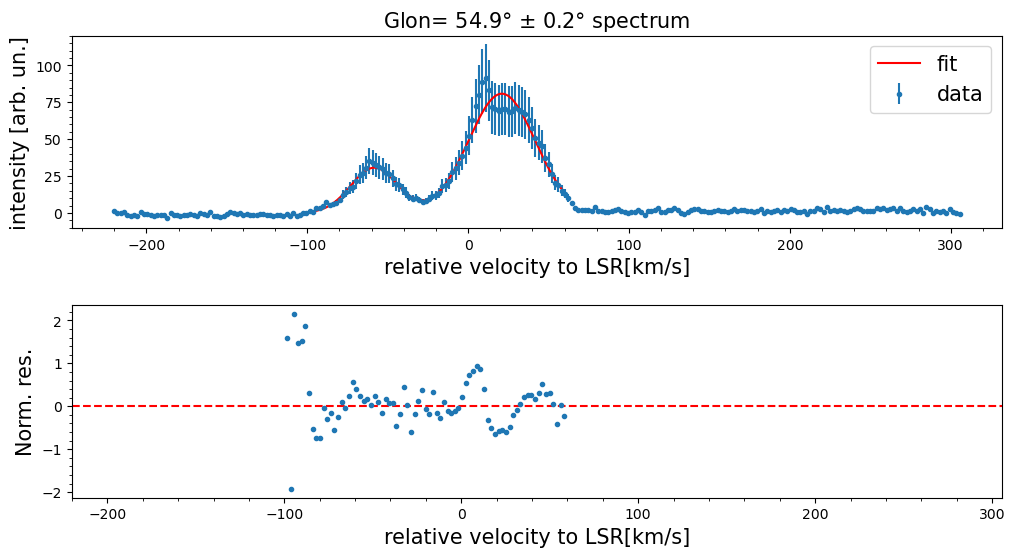

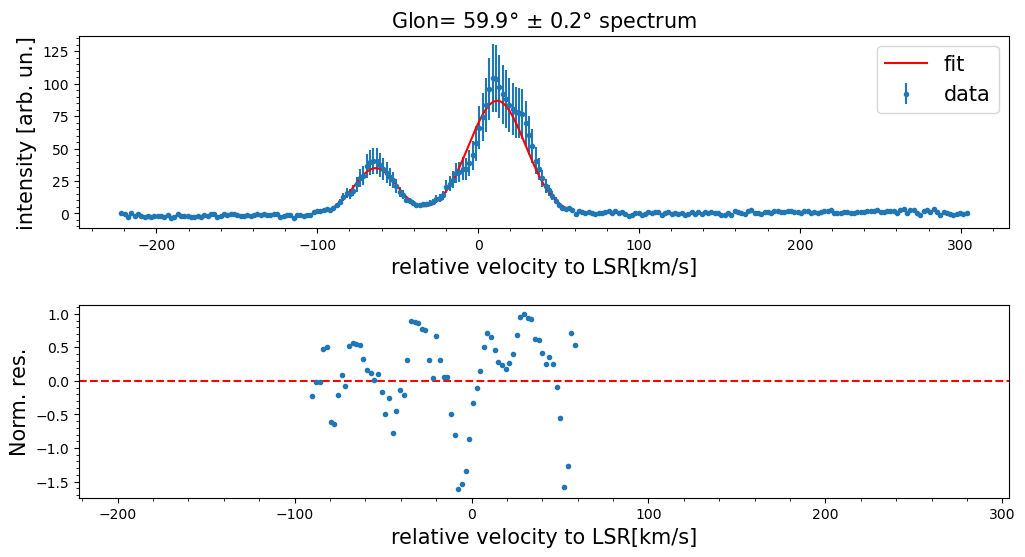

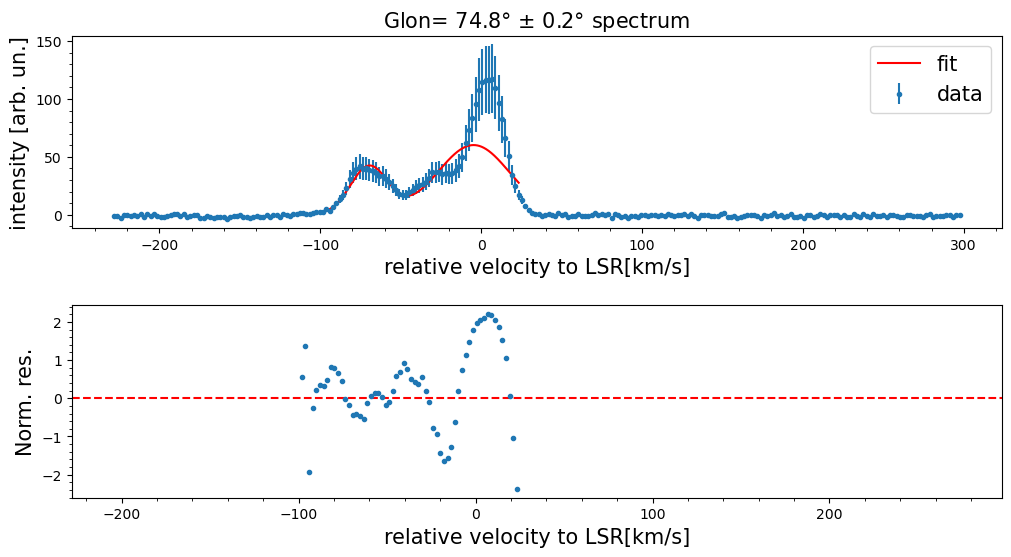

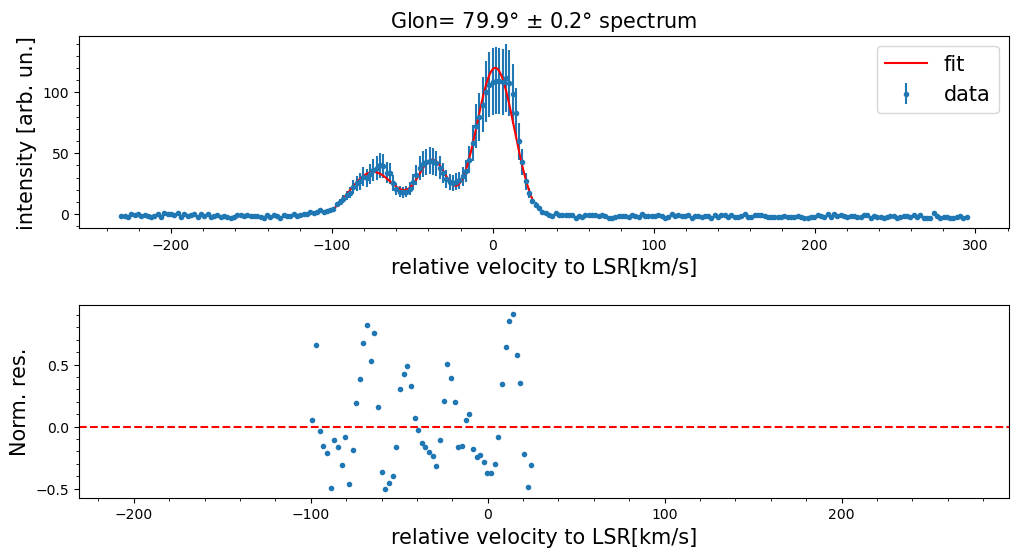

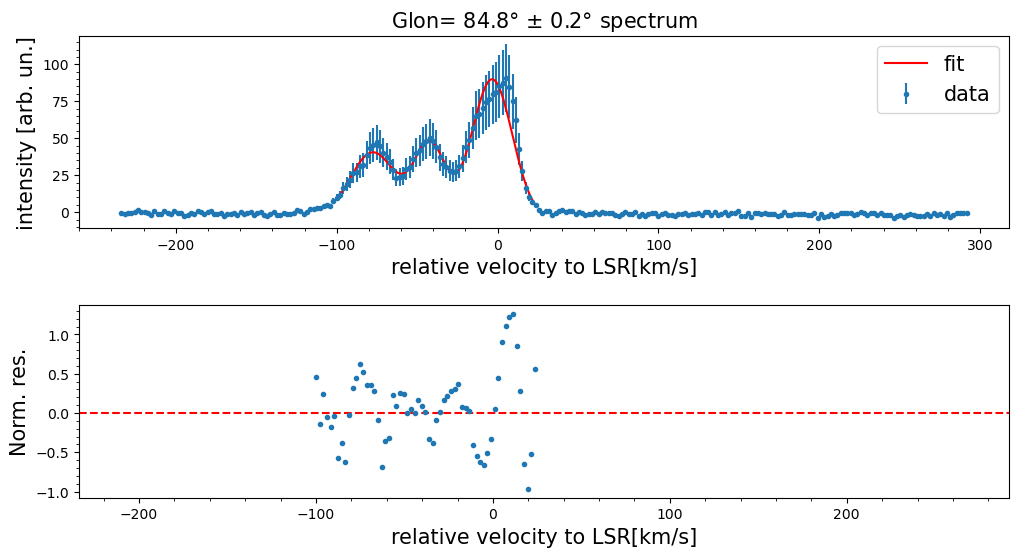

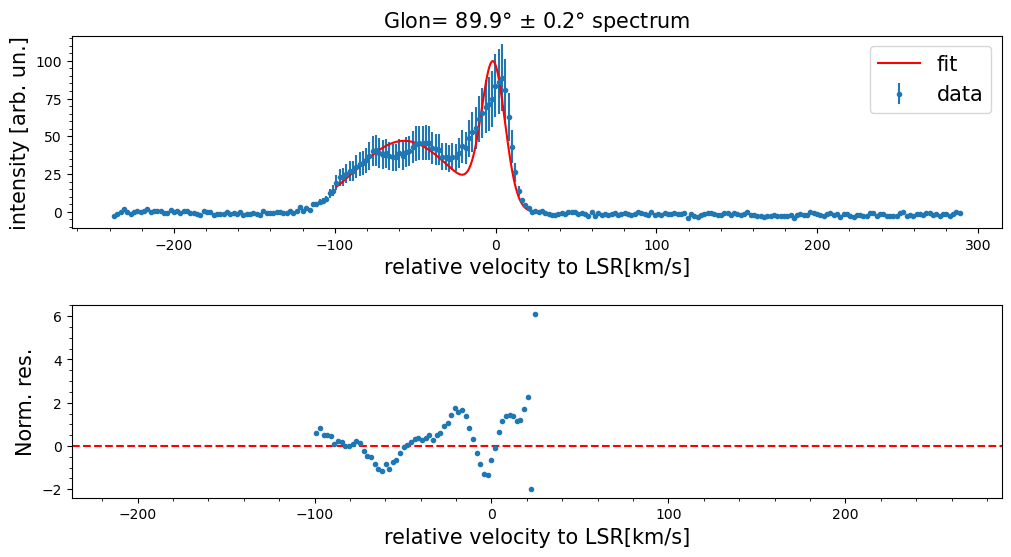

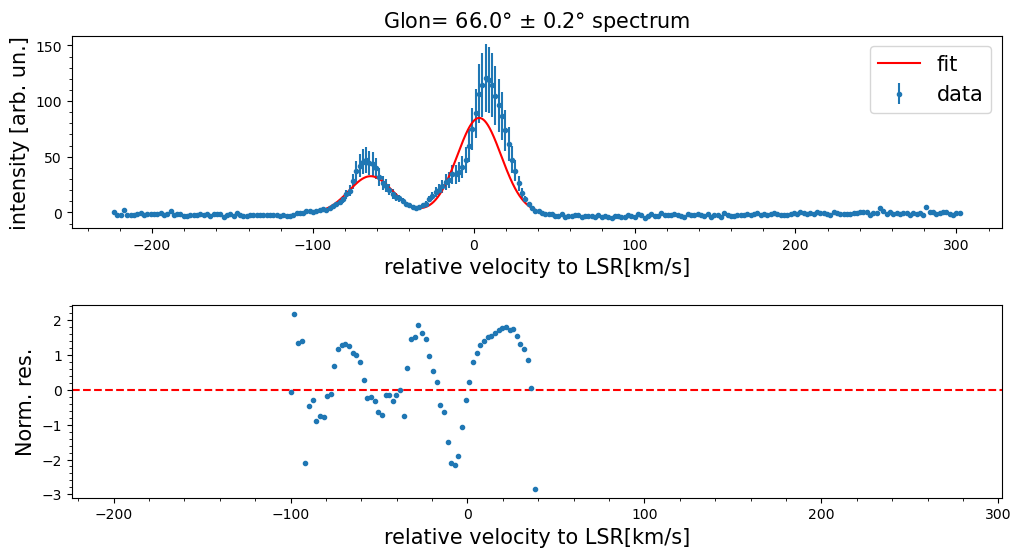

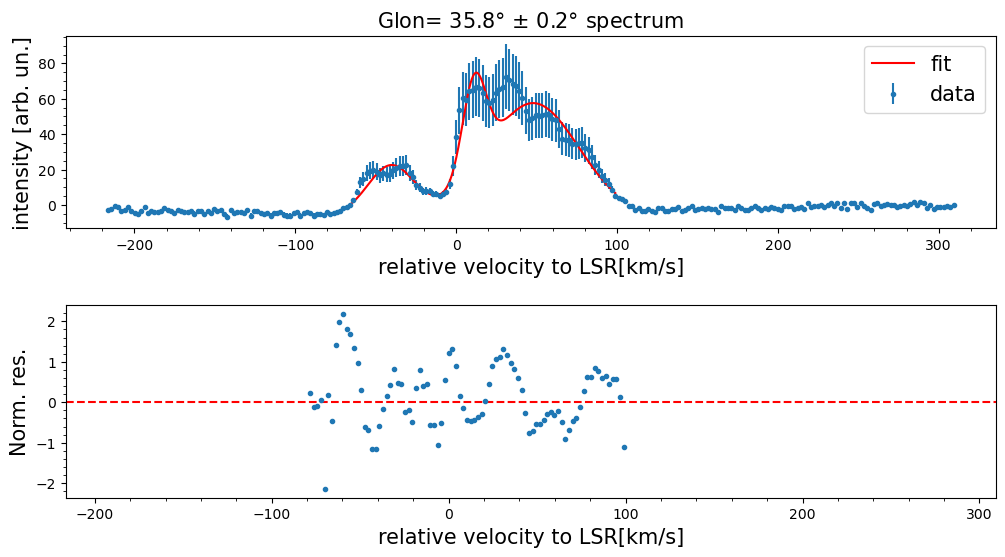

In [4]:
#fitting
V=[]
dV=[]
R=[]
dR=[]

for ii in range(len(I_quad)):
    input_filename=I_quad[ii]
    mg_fit=Radio_fitter("relative velocity to LSR[km/s]", "intensity [arb. un.]")
    mg_fit.read_data(input_filename)
    
    mg_fit.baseline(beg[ii],end[ii])
    mg_fit.fit_data()
    mg_fit.plot_res()
    
    v1,dv1=mg_fit.abs_velocity()
    r1,dr1=mg_fit.distance_GC_tangent()
    mg_fit.print_fit_rotation_curve()
    
    V=np.append(V,v1)
    dV=np.append(dV,dv1)
    R=np.append(R,r1)
    dR=np.append(dR,dr1)
    mg_fit.save_fit_rotation_curve()
    

**OSSERVAZIONI**

Dai grafici noto
1. Molta variazione tra 2 e 3 gaussiane. 
2. difficoltà nel distinguere piccole gaussiane vicine-> piccole diminuzioni in ampiezza o shift verso desta
3. Alcuni parametri delle gaussiane sembrano estremamente correlati 
4. Chi quadri ridotti molto piccoli per via dei grandi errori
5. Residui ben distribuiti quando non si trovano le difficoltà del punto 2

## CURVA DI ROTAZIONE

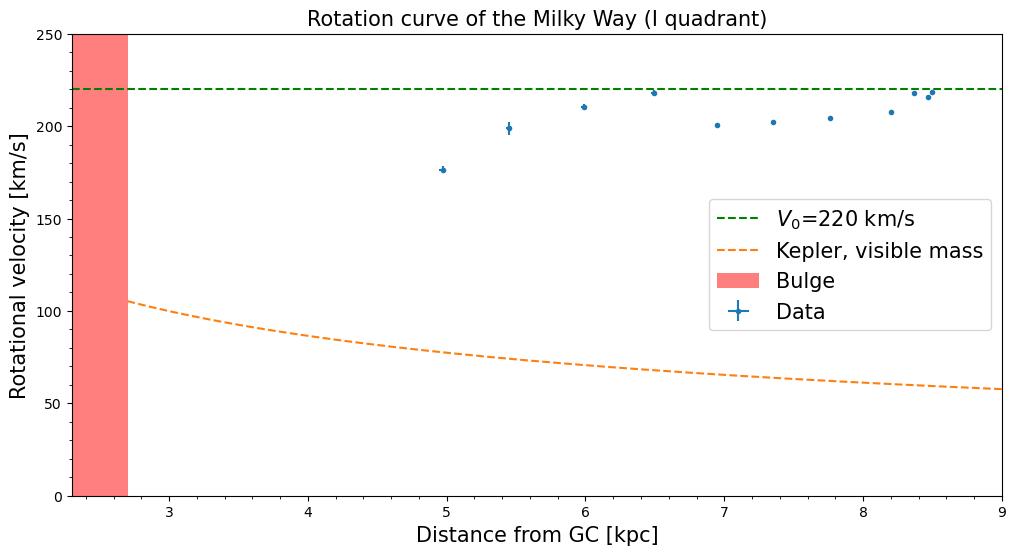

In [5]:
plt.figure(figsize=(12,6))
plt.title("Rotation curve of the Milky Way (I quadrant)",fontsize=15)
plt.xlabel("Distance from GC [kpc]",fontsize=15)
plt.ylabel("Rotational velocity [km/s]",fontsize=15)
plt.minorticks_on()

plt.errorbar(R, V, yerr=dV, xerr=dR, fmt='.', label='Data')
plt.axhline(220, linestyle='dashed', color='green',label='$V_0$=220 km/s')
plt.axhspan(0, 250, 0, 0.06, facecolor='red', alpha=0.5, label='Bulge')

def kepler(x,A):
    return A/np.sqrt(x)

Omega_bulge=39 #km/(s kpc)
R_bulge=2.7#kpc
V_max=Omega_bulge*R_bulge
A_atteso=V_max*np.sqrt(R_bulge)

yy=np.linspace(R_bulge,9, 1000)
plt.plot(yy, kepler(yy,A_atteso), linestyle='dashed', label='Kepler, visible mass')

plt.legend(loc='best',fontsize=15)
plt.ylim([0,250])
plt.xlim([2.3,9])

main_dir = os.getcwd() #define work, results directories and path of the output file
results_julia_dir = os.path.join(main_dir,"results_julia")
output_filename = os.path.join(results_julia_dir,"Rotation curve")
plt.savefig(output_filename+".png")